<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Dataset Info:
 None

Null Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


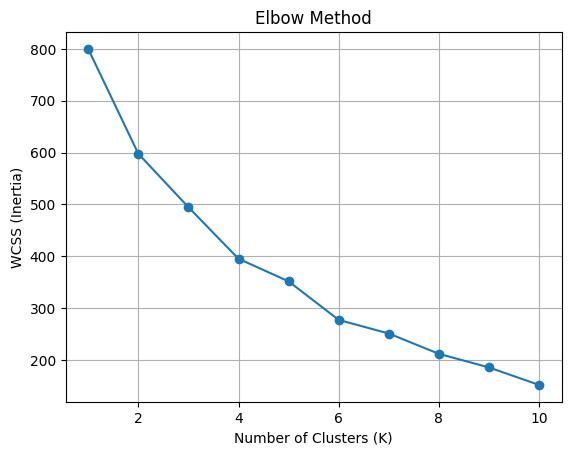

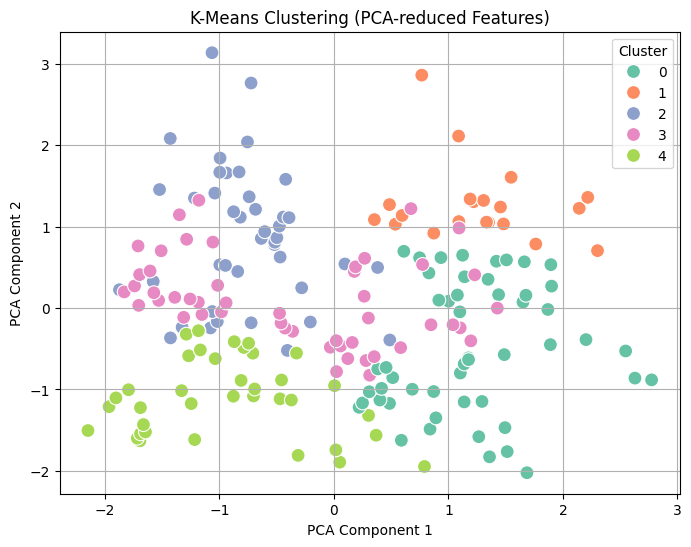


Silhouette Score: 0.272


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#load dataset
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')  # Adjust path as needed

#basic info
print("Dataset Info:\n", df.info())
print("\nNull Values:\n", df.isnull().sum())

#drop CustomerID (not useful for clustering)
df.drop('CustomerID', axis=1, inplace=True)

#convert categorical Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

#feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


#Elbow Method to Find Optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#plot the Elbow Curve
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()


#fit KMeans with Optimal K
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df['Cluster'] = clusters


#PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title("K-Means Clustering (PCA-reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


#evaluate Clustering
score = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score: {score:.3f}")
